> Import dataset

In [ ]:
pip install tsaug

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import libraries

import os
import shutil
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from pickle import dump
from tsaug import AddNoise
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

plt.rc('font', size=16) 

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


In [ ]:
# Set seed for reproducibility

seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
# Load the dataset

x_data = np.load('../input/training-dataset-homework2zip/x_train.npy')
y_data = np.load('../input/training-dataset-homework2zip/y_train.npy')
x_data.shape, y_data.shape

((2429, 36, 6), (2429,))

> Inspect data

In [ ]:
labels = ['Wish',         # 0
          'Another',      # 1
          'Comfortably',  # 2
          'Money',        # 3
          'Breathe',      # 4
          'Time',         # 5
          'Brain',        # 6
          'Echoes',       # 7
          'Wearing',      # 8
          'Sorrow',       # 9
          'Hey',          # 10
          'Shine']        # 11

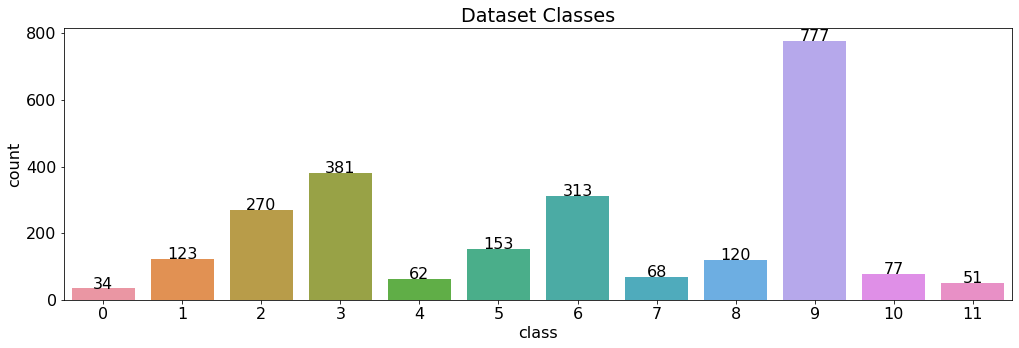

In [ ]:
# Inspect classes

df = pd.DataFrame(y_data, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Dataset Classes')
plt.show()


> Preprocessing

In [ ]:
# Reshape data

#reshape the data in a format where each feature is a column
num_instances, num_time_steps, num_features = x_data.shape
x_data_flat = np.reshape(x_data, newshape=(-1, num_features))

#create the dataframe
columns = ['col_0','col_1','col_2','col_3','col_4','col_5']
df_data = pd.DataFrame(x_data_flat, columns = columns)
df_data

,col_0,col_1,col_2,col_3,col_4,col_5
0,17.59700,8.17130,-1.78420,-19.70600,-9.71350,-61.8870
1,0.22974,-5.89560,16.83700,5.03900,2.43320,58.9140
2,-29.65400,-21.29600,29.10300,-0.47503,75.39100,10.6650
3,-59.21000,-29.56500,17.97100,-45.60600,19.41200,-43.0140
4,-72.06400,-25.85500,0.46536,-59.15100,-29.10500,-11.9130
...,...,...,...,...,...,...
87439,3.51190,-1.03240,-1.69900,4.15790,2.75430,5.9823
87440,0.70853,-0.94622,-1.91760,2.09480,-4.76750,7.4118
87441,0.20638,1.02870,-0.92512,-0.71633,1.73330,4.7638
87442,4.14290,1.09390,-0.18921,1.14100,0.93441,4.1742


In [ ]:
# Reshape labels

y_data_flat = []
for i in range(0, y_data.shape[0]):
    for j in range (i*36,(i+1)*36):
        y_data_flat = np.append(y_data_flat, y_data[i])
y_data_flat = y_data_flat.astype(int)

df_data["class"] = y_data_flat
df_data

,col_0,col_1,col_2,col_3,col_4,col_5,class
0,17.59700,8.17130,-1.78420,-19.70600,-9.71350,-61.8870,0
1,0.22974,-5.89560,16.83700,5.03900,2.43320,58.9140,0
2,-29.65400,-21.29600,29.10300,-0.47503,75.39100,10.6650,0
3,-59.21000,-29.56500,17.97100,-45.60600,19.41200,-43.0140,0
4,-72.06400,-25.85500,0.46536,-59.15100,-29.10500,-11.9130,0
...,...,...,...,...,...,...,...
87439,3.51190,-1.03240,-1.69900,4.15790,2.75430,5.9823,11
87440,0.70853,-0.94622,-1.91760,2.09480,-4.76750,7.4118,11
87441,0.20638,1.02870,-0.92512,-0.71633,1.73330,4.7638,11
87442,4.14290,1.09390,-0.18921,1.14100,0.93441,4.1742,11


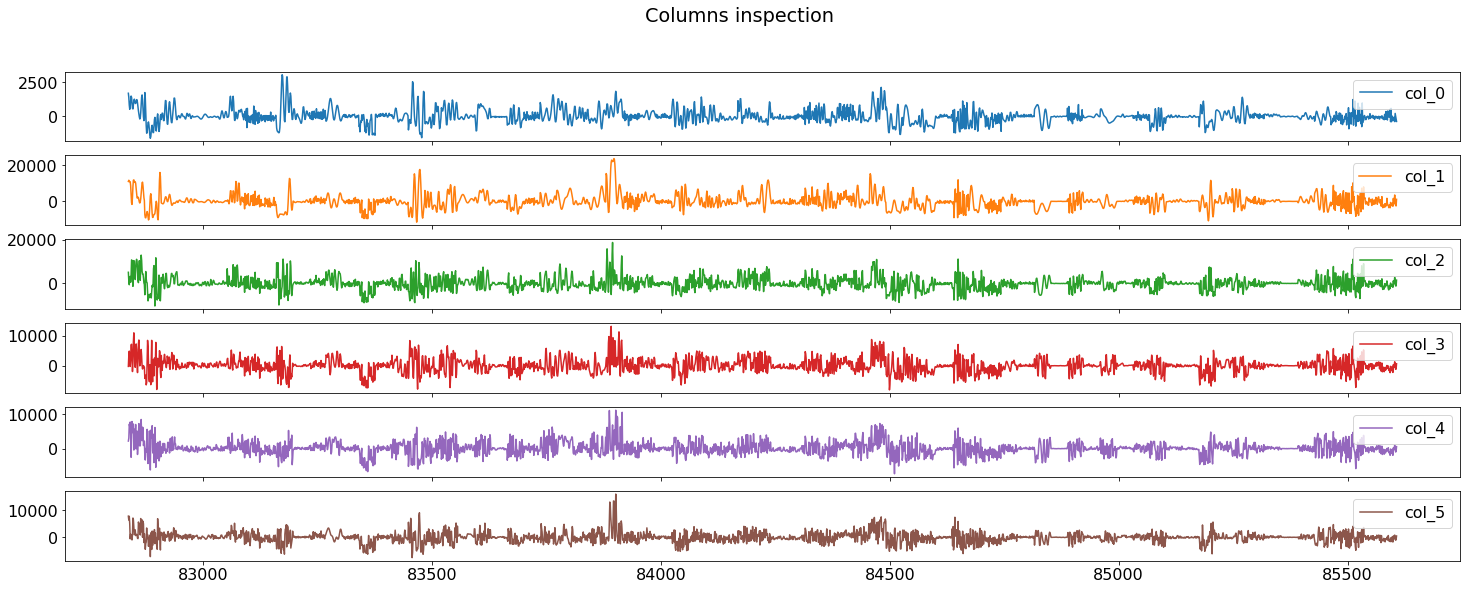

In [ ]:
# Show columns' trends

axis = (df_data[df_data['class'] == 10][columns]).plot(subplots=True, figsize=(25, 9), title="Columns inspection")
for ax in axis:
    ax.legend(loc='upper right')

In [ ]:
# Show sequence's trend

def inspect_seq(x_seq, idx):
    x_values = np.reshape(x_seq[idx], newshape=(-1, x_seq.shape[2])) #reshape and select the idx-th element 
    x_values = pd.DataFrame(x_values, columns = columns) #convert into dataframe

    axis = x_values.plot(subplots=True, figsize=(17, 9), title="Columns inspection") #plot each column
    for ax in axis:
        ax.legend(loc='upper right')

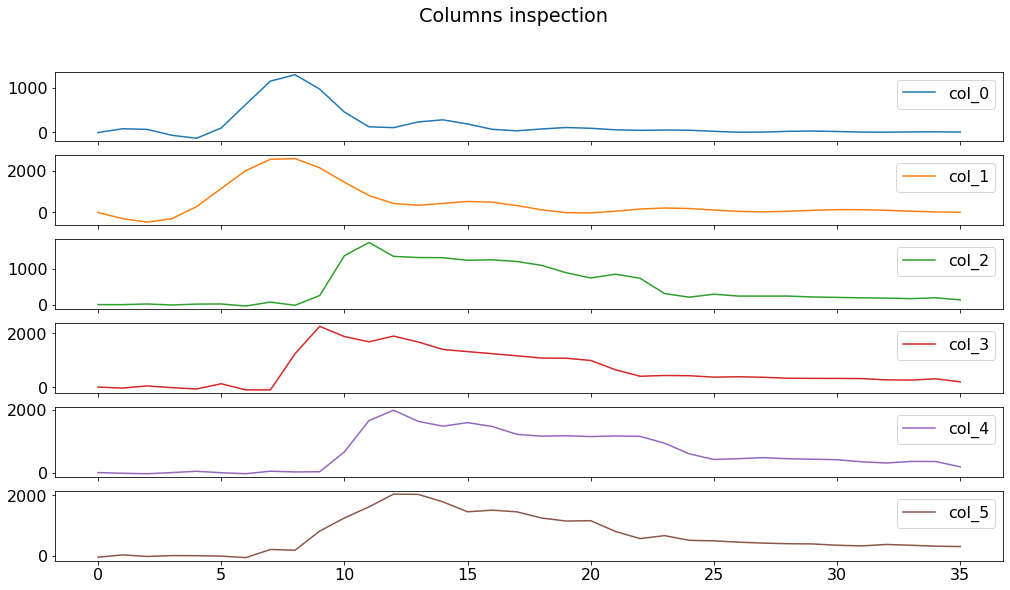

In [ ]:
# Inspect n-th sequence

n = 2400
inspect_seq(x_data, n)

In [ ]:
# Split into train and test

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=seed, shuffle=True, stratify=y_data)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1943, 36, 6), (486, 36, 6), (1943,), (486,))

In [ ]:
# Standardize dataset values with mean 0 and variance 1

#fit scaler on train set
num_instances, num_time_steps, num_features = x_train.shape
x_data_flat = np.reshape(x_train, newshape=(-1, num_features))

scaler = StandardScaler()
scaler = scaler.fit(x_data_flat)

x_train = np.reshape(x_data_flat, newshape=(num_instances, num_time_steps, num_features))

In [ ]:
# Data augmentation

my_augmenter = AddNoise(scale=(0.1, 0.3)) @ 1.0  # with 100% probability, add random noise up to 10% - 30%
x_train_aug = my_augmenter.augment(x_train)

x_train_aug = np.concatenate((x_train,x_train_aug))
y_train_aug = np.concatenate((y_train,y_train))

x_train_aug.shape, y_train_aug.shape

((3886, 36, 6), (3886,))

In [ ]:
# Inspect augmented data

#reshape the data in a format where each feature is a column
num_instances, num_time_steps, num_features = x_train.shape
x_train_flat = np.reshape(x_train, newshape=(-1, num_features))

#create the dataframe
df_train = pd.DataFrame(x_train_flat, columns = columns)

y_data_flat = []
for i in range(0, y_train.shape[0]):
    for j in range (i*36,(i+1)*36):
        y_data_flat = np.append(y_data_flat, y_train[i])
y_data_flat = y_data_flat.astype(int)
df_train["class"] = y_data_flat


#reshape the data in a format where each feature is a column
num_instances, num_time_steps, num_features = x_train_aug.shape
x_train_aug_flat = np.reshape(x_train_aug, newshape=(-1, num_features))

#create the dataframe
df_train_aug = pd.DataFrame(x_train_aug_flat, columns = columns)

y_data_flat = []
for i in range(0, y_train_aug.shape[0]):
    for j in range (i*36,(i+1)*36):
        y_data_flat = np.append(y_data_flat, y_train_aug[i])
y_data_flat = y_data_flat.astype(int)
df_train_aug["class"] = y_data_flat

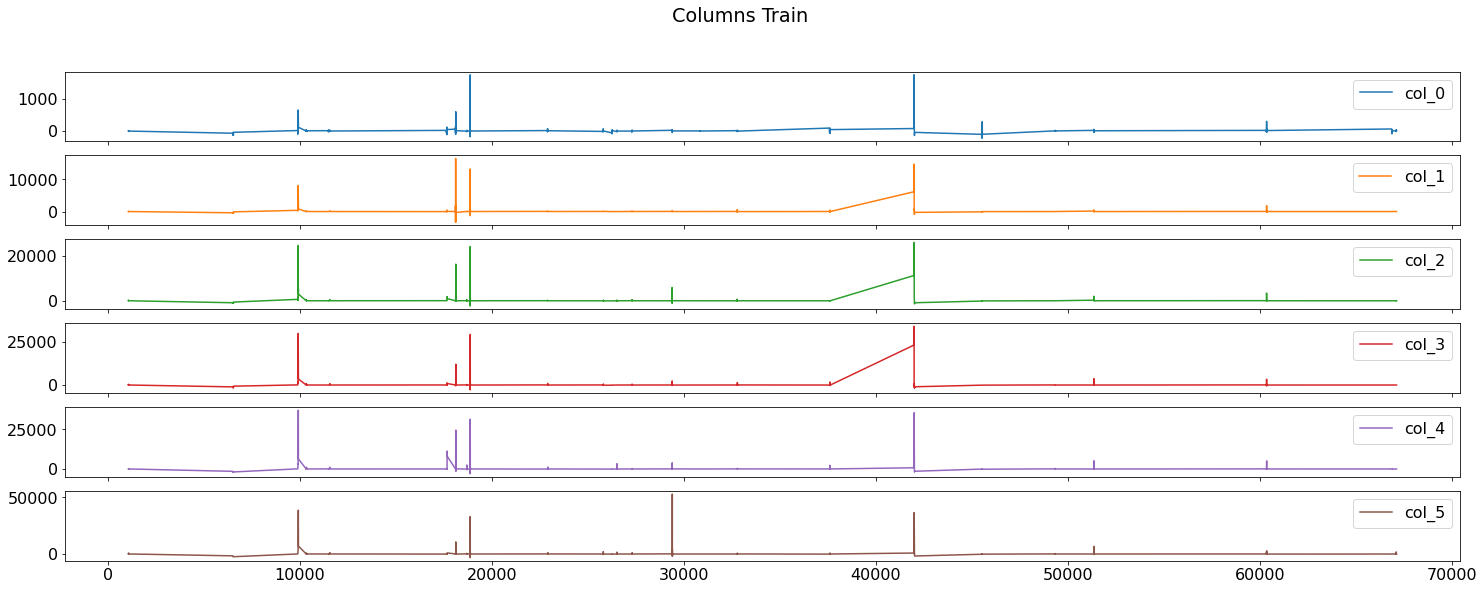

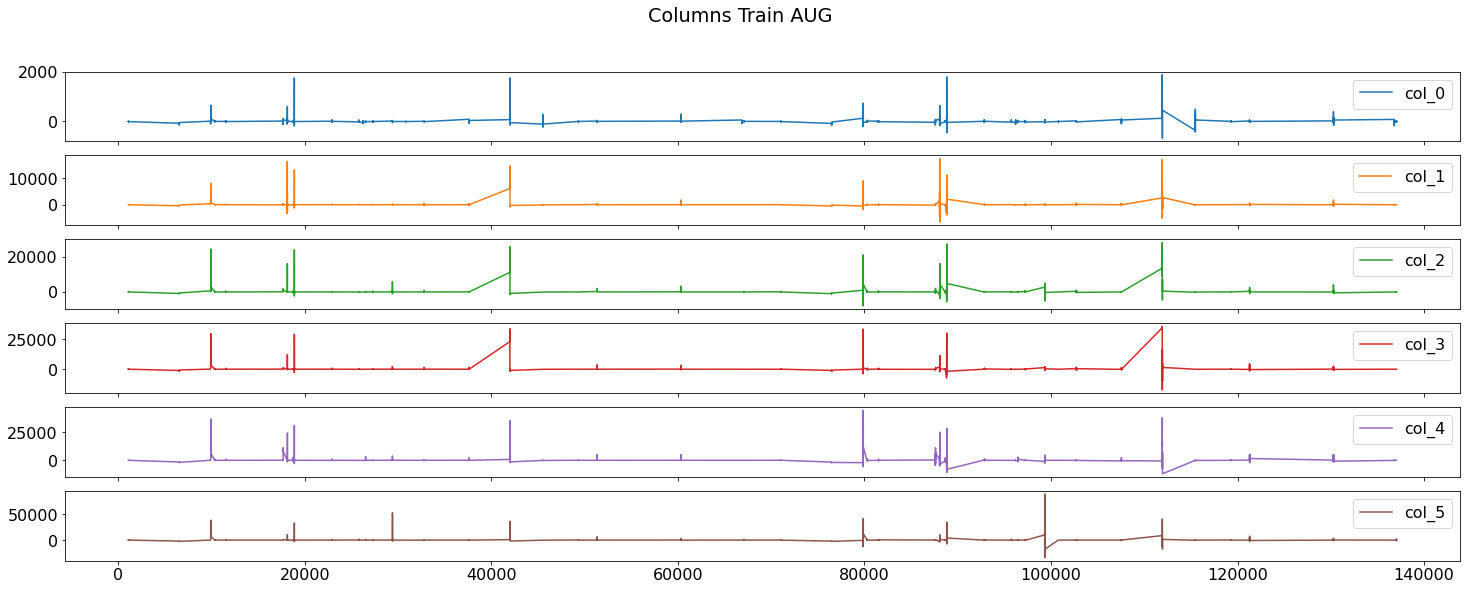

In [ ]:
# Plot augmented data and compare with the original sample

axis1 = (df_train[df_train['class'] == 0][columns]).plot(subplots=True, figsize=(25, 9), title="Columns Train")
for ax in axis1:
    ax.legend(loc='upper right')
axis2 = (df_train_aug[df_train_aug['class'] == 0][columns]).plot(subplots=True, figsize=(25, 9), title="Columns Train AUG")
for ax in axis2:
    ax.legend(loc='upper right')

In [ ]:
# Standardize dataset values with mean 0 and variance 1

#transform train set
num_instances, num_time_steps, num_features = x_train_aug.shape
x_data_flat = np.reshape(x_train_aug, newshape=(-1, num_features))

x_data_flat = scaler.transform(x_data_flat)

x_train_aug = np.reshape(x_data_flat, newshape=(num_instances, num_time_steps, num_features))


#transform test set
num_instances, num_time_steps, num_features = x_test.shape
x_data_flat = np.reshape(x_test, newshape=(-1, num_features))

x_data_flat = scaler.transform(x_data_flat)

x_test = np.reshape(x_data_flat, newshape=(num_instances, num_time_steps, num_features))

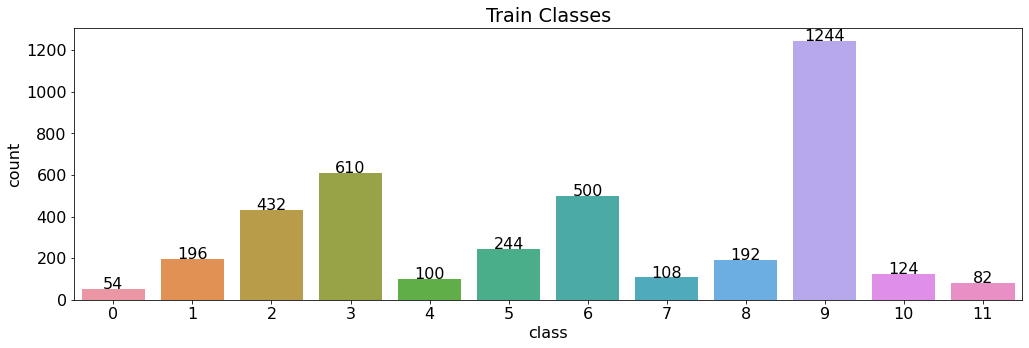

In [ ]:
# Inspect train split

df = pd.DataFrame(y_train_aug, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Train Classes')
plt.show()

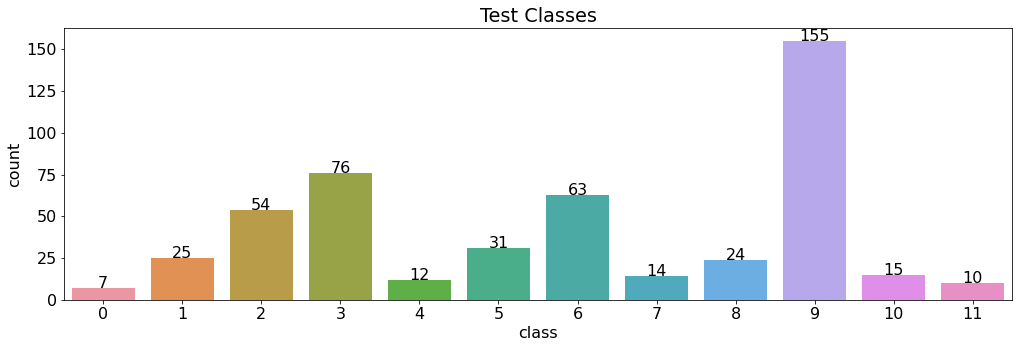

In [ ]:
# Inspect test split

df = pd.DataFrame(y_test, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Test Classes')
plt.show()

In [ ]:
# Convert labels in one-hot-encoding

print(y_train_aug[0])
y_train_aug = tfk.utils.to_categorical(y_train_aug)
y_test = tfk.utils.to_categorical(y_test)
print(y_train_aug[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


> Build and train the model

In [ ]:
# Define parameter of the model

input_shape = x_train_aug.shape[1:]
classes = y_train_aug.shape[-1]
batch_size = 128
epochs = 400

In [ ]:
# Define the model

def build_resnet(input_shape,nb_classes):
    n_feature_maps = 64
    
    #block 1
    input_layer = tfkl.Input(shape=(input_shape))
    x1 = input_layer
    conv_x = tfkl.Conv1D(n_feature_maps, 8, 1, padding='same')(input_layer)
    conv_x = tfkl.Activation('relu')(conv_x)
        
    conv_y = tfkl.Conv1D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = tfkl.Activation('relu')(conv_y)     
        
    conv_z = tfkl.Conv1D(n_feature_maps, 3, 1, padding='same')(conv_y)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        x1 = tfkl.Conv1D(n_feature_maps, 1, 1,padding='same')(input_layer)
        
    #Merging skip connection
    y = tfkl.Add()([x1, conv_z])
    y = tfkl.Activation('relu')(y)
    
    #block 2 
    x1 = y
    conv_x = tfkl.Conv1D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = tfkl.Activation('relu')(conv_x)     
        
    conv_y = tfkl.Conv1D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = tfkl.Activation('relu')(conv_y)
     
    conv_z = tfkl.Conv1D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        x1 = tfkl.Conv1D(n_feature_maps*2, 1, 1,padding='same')(x1)        
        
    #Merging skip connection
    y = tfkl.Add()([x1, conv_z])
    y = tfkl.Activation('relu')(y)     
    
    #block 3    
    x1 = y
    conv_x = tfkl.Conv1D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = tfkl.Activation('relu')(conv_x)     
        
    conv_y = tfkl.Conv1D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = tfkl.Activation('relu')(conv_y)     
        
    conv_z = tfkl.Conv1D(n_feature_maps*2, 3, 1, padding='same')(conv_y)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        x1 = tfkl.Conv1D(n_feature_maps*2, 1, 1,padding='same')(x1)
            
    #Merging skip connection
    y = tfkl.Add()([x1, conv_z])
    y = tfkl.Activation('relu')(y)
     
    full = tfkl.GlobalAveragePooling1D()(y)
    
    # Classifier
    dropout = tfkl.Dropout(.5, seed=seed)(full)
    
    output_layer = tfkl.Dense(nb_classes, activation='softmax')(dropout)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    return model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 36, 6)]      0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 36, 64)       3136        input_2[0][0]                    
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 36, 64)       0           conv1d_3[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 36, 64)       20544       activation_2[0][0]               
______________________________________________________________________________________________

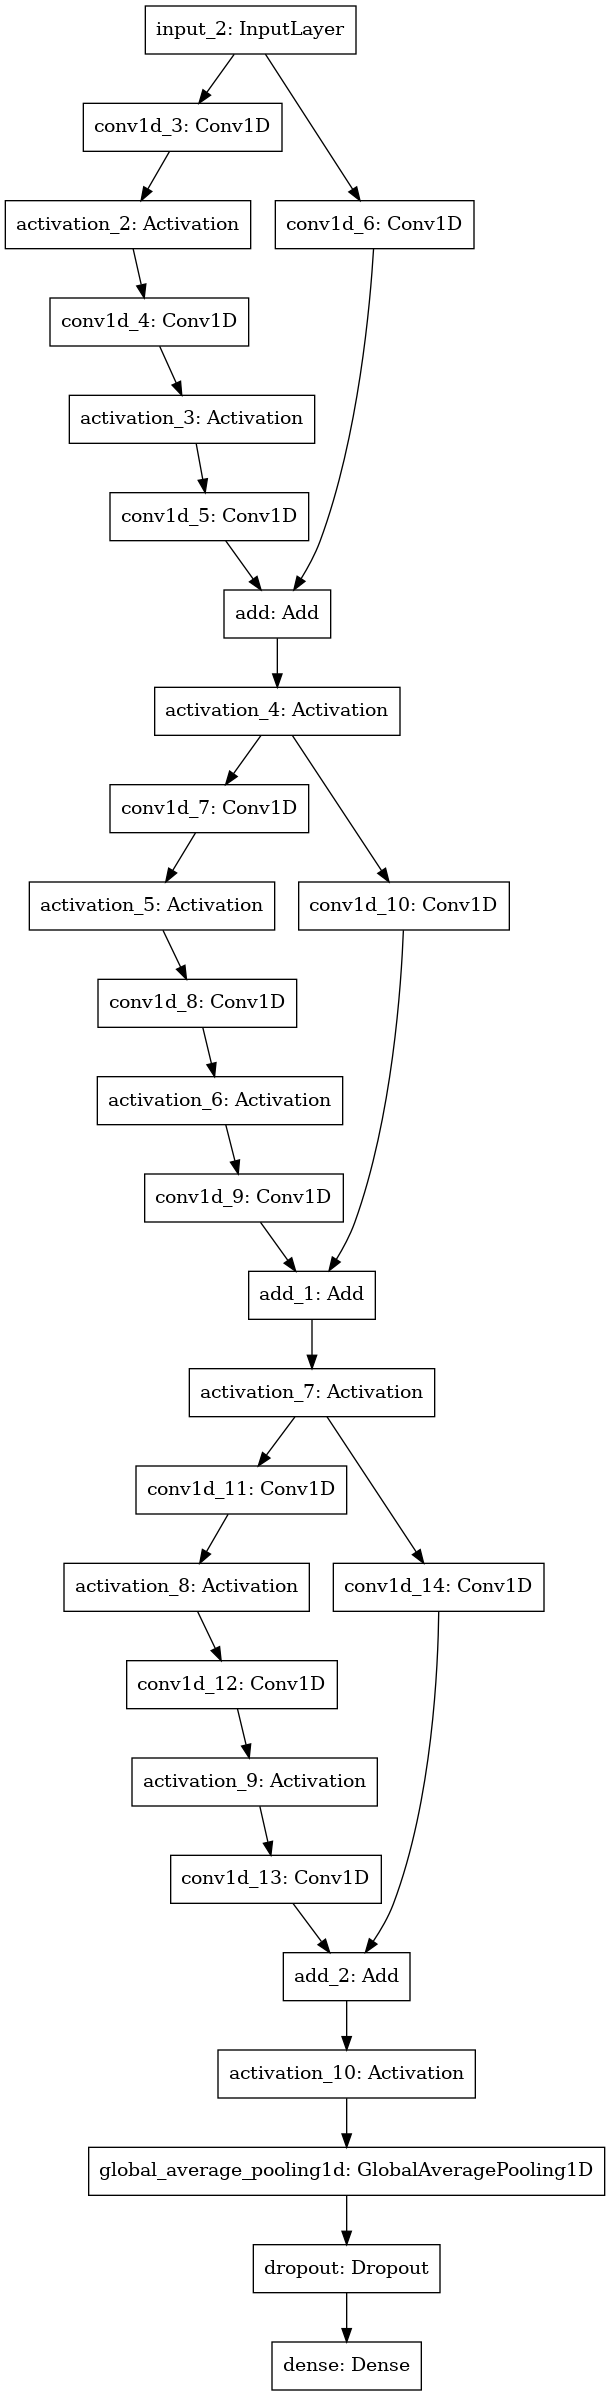

In [ ]:
# Build the model

model = build_resnet(input_shape, classes)
model.summary()
tfk.utils.plot_model(model)

In [ ]:
# Train the model

history = model.fit(
    x = x_train_aug,
    y = y_train_aug,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=50, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=10, factor=0.75, min_lr=1e-5)
    ]
).history

2022-12-19 11:38:43.732145: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400


2022-12-19 11:38:45.496479: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


31/31 [==============================] - 8s 31ms/step - loss: 2.2055 - accuracy: 0.2910 - val_loss: 1.9769 - val_accuracy: 0.3354
Epoch 2/400
31/31 [==============================] - 0s 12ms/step - loss: 1.9621 - accuracy: 0.3621 - val_loss: 1.8878 - val_accuracy: 0.3827
Epoch 3/400
31/31 [==============================] - 0s 12ms/step - loss: 1.8355 - accuracy: 0.4020 - val_loss: 1.7484 - val_accuracy: 0.3951
Epoch 4/400
31/31 [==============================] - 0s 12ms/step - loss: 1.7467 - accuracy: 0.4297 - val_loss: 1.6959 - val_accuracy: 0.4321
Epoch 5/400
31/31 [==============================] - 0s 12ms/step - loss: 1.6197 - accuracy: 0.4588 - val_loss: 1.4924 - val_accuracy: 0.4835
Epoch 6/400
31/31 [==============================] - 0s 12ms/step - loss: 1.5346 - accuracy: 0.4884 - val_loss: 1.4804 - val_accuracy: 0.4733
Epoch 7/400
31/31 [==============================] - 0s 12ms/step - loss: 1.4857 - accuracy: 0.5033 - val_loss: 1.4174 - val_accuracy: 0.5267
Epoch 8/400
31/31 

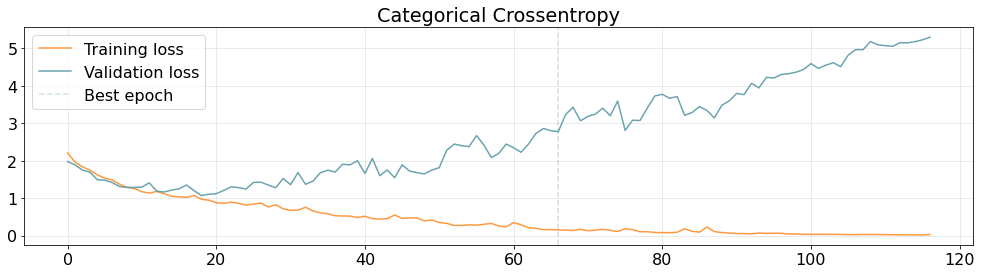

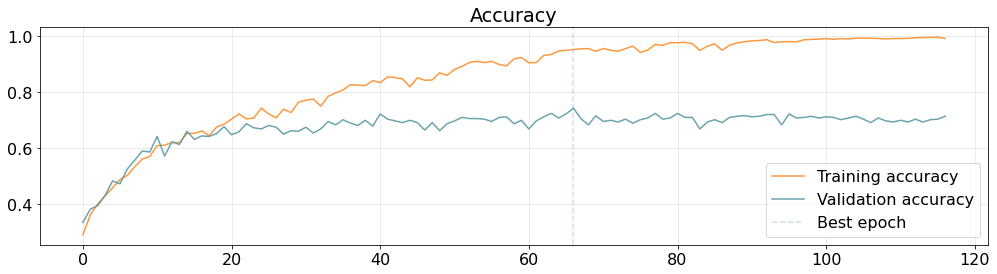

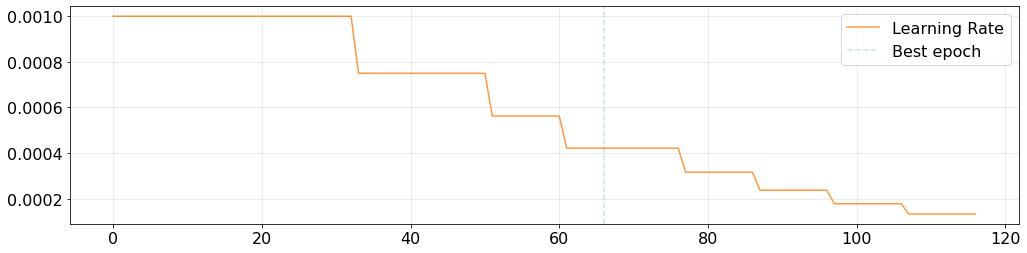

In [ ]:
# Plot results

best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Predict the test set 

predictions = model.predict(x_test)
predictions.shape

(486, 12)

Accuracy: 0.7428
Precision: 0.7394
Recall: 0.661
F1: 0.6924


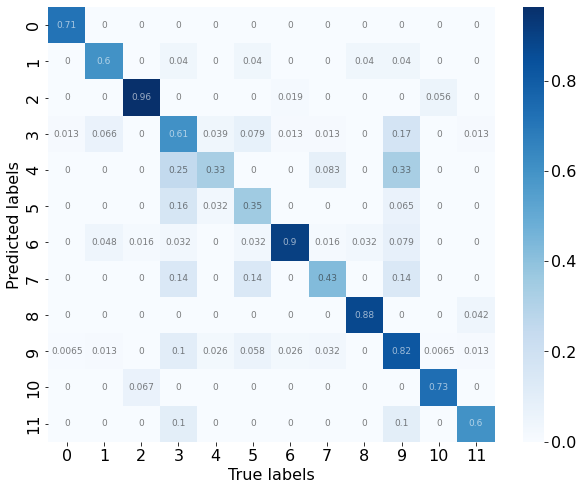

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

cm = cm /cm.astype(float).sum(axis=1);

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', annot=True, annot_kws={'fontsize':9,'alpha':0.6})#, xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
# Save the model

model.save('SubmissionModel')
shutil.make_archive("SubmissionModel", 'zip', "./SubmissionModel")

2022-12-19 11:39:39.884304: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


'/kaggle/working/SubmissionModel.zip'

In [ ]:
# Save the scaler

dump(scaler, open('scaler.pkl', 'wb'))